In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
import torch
print(torch.__version__)

2.2.2+cpu


# Data manipulation

## Creating tensors

In [105]:
# 1D tensor
x_1 = torch.arange(12, dtype=torch.float32)
print('1d', x_1)

# 2D tensor
x_2 = x_1.reshape(3, 4)
print('2d', x_2)

# 3D tensor
x_3 = x_1.reshape(3, 2, 2)
print('3d', x_3)

# zero tensor
x_4 = torch.zeros((2, 3, 4))
print('zero', x_4)

# one tensor
x_5 = torch.ones((2, 3, 4))
print('one', x_5)

# random tensor
x_6 = torch.rand((2, 3, 4))
print('rand', x_6)

# list to tensor
x_7 = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32)
print('list', x_7)


1d tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])
2d tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
3d tensor([[[ 0.,  1.],
         [ 2.,  3.]],

        [[ 4.,  5.],
         [ 6.,  7.]],

        [[ 8.,  9.],
         [10., 11.]]])
zero tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
one tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
rand tensor([[[0.2936, 0.9378, 0.9529, 0.5478],
         [0.7379, 0.3951, 0.6603, 0.6533],
         [0.2673, 0.1341, 0.6040, 0.4934]],

        [[0.6694, 0.3926, 0.4209, 0.4507],
         [0.4519, 0.5893, 0.1626, 0.9003],
         [0.9737, 0.9319, 0.1277, 0.9916]]])
list tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


## Slicing

In [106]:
print('Last row')
print(x_7[-1])

# We do not include the last element
print('\nCol 2 and 3')
print(x_7[1:3])

# Writing to tensor
print('\nOverwrite 3rd row with 0s')
x_7[2] = 0
print(x_7)

Last row
tensor([7., 8., 9.])

Col 2 and 3
tensor([[4., 5., 6.],
        [7., 8., 9.]])

Overwrite 3rd row with 0s
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [0., 0., 0.]])


## Operations

In [107]:
print('basic operations')
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
print(x + y, '\n', x - y, '\n', x * y, '\n', x / y, '\n', x ** y)

print('\nConcatenation')
x = torch.arange(12, dtype=torch.float32).reshape(3, 4)
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print(torch.cat((x, y), dim=0))
print('\n',torch.cat((x, y), dim=1))

print('\nLogical operations')
print(x == y)

basic operations
tensor([ 3.,  4.,  6., 10.]) 
 tensor([-1.,  0.,  2.,  6.]) 
 tensor([ 2.,  4.,  8., 16.]) 
 tensor([0.5000, 1.0000, 2.0000, 4.0000]) 
 tensor([ 1.,  4., 16., 64.])

Concatenation
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

Logical operations
tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])


# Linear algebra

### Summation

In [108]:
X = torch.arange(24).reshape(2, 3, 4)
Y = torch.arange(12).reshape(3, 4)
print(X)
print(Y)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [109]:
# sum all elements
print(Y.sum())

# sum over row elements
print(Y.sum(axis=0))

sum_Y_row = Y.sum(axis=1, keepdims=True)
sum_Y_col = Y.sum(axis=0, keepdims=True)
print(sum_Y_row)
print(sum_Y_col)

tensor(66)
tensor([12, 15, 18, 21])
tensor([[ 6],
        [22],
        [38]])
tensor([[12, 15, 18, 21]])


### Multiplication

In [110]:
A = torch.arange(6).reshape(3, 2)
B = torch.arange(3)
C = A.clone() # Assign a copy of `A` to `C` by allocating new memory
C = C.T
D = torch.arange(6).reshape(2, 3)
print(A)
print(B)
print(C)
print(D)

tensor([[0, 1],
        [2, 3],
        [4, 5]])
tensor([0, 1, 2])
tensor([[0, 2, 4],
        [1, 3, 5]])
tensor([[0, 1, 2],
        [3, 4, 5]])


In [111]:
#Dot product
print(torch.dot(A[:,0], B))

# Matrix vector multiplication
# MxN-matrix dot n-vector
print(C@B)

# Matrix multiplication
# MxN-matrix dot NxD-matrix
print(A@D)

tensor(10)
tensor([10, 13])
tensor([[ 3,  4,  5],
        [ 9, 14, 19],
        [15, 24, 33]])


# Calculus

In [112]:
def f(x):
    return 4 * x ** 2 + 3 * x - 5

# Compute the numerical limit of f(x) at x = 1
# h = delta x
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=11.40000
h=0.01000, numerical limit=11.04000
h=0.00100, numerical limit=11.00400
h=0.00010, numerical limit=11.00040
h=0.00001, numerical limit=11.00004


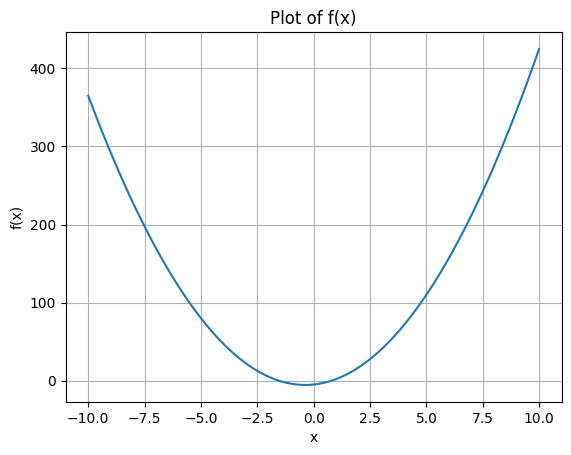

In [113]:
# Define the function f(x)
def f(x):
    return 4 * x ** 2 + 3 * x - 5

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate y values using f(x)
y = f(x)

# Plot the function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.show()
